Codificación de las variables categoricas, escalado y modelo

In [3]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
# conda install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [5]:
pd_loan_train = pd.read_csv("./data//train_df_data_preprocessing_missing_outlier.csv")
                  
pd_loan_test = pd.read_csv("./data//test_df_data_preprocessing_missing_outlier.csv")
                  

In [6]:
pd_loan_train.shape  

(800000, 33)

In [7]:
pd_loan_test.shape

(200000, 33)

In [8]:
pd_loan_train.columns #columnas del train

Index(['Unnamed: 0', 'intended_balcon_amount', 'prev_address_months_count',
       'bank_months_count', 'current_address_months_count',
       'session_length_in_minutes', 'device_distinct_emails_8w',
       'foreign_request', 'phone_mobile_valid', 'has_other_cards',
       'proposed_credit_limit', 'device_os', 'source', 'housing_status',
       'keep_alive_session', 'device_fraud_count', 'phone_home_valid',
       'credit_risk_score', 'email_is_free', 'income', 'employment_status',
       'date_of_birth_distinct_emails_4w', 'bank_branch_count_8w',
       'velocity_4w', 'velocity_24h', 'velocity_6h', 'zip_count_4w',
       'payment_type', 'days_since_request', 'customer_age',
       'name_email_similarity', 'month', 'fraud_bool'],
      dtype='object')

In [9]:
pd_loan_train.dtypes  #tipos columnas del train

Unnamed: 0                            int64
intended_balcon_amount              float64
prev_address_months_count           float64
bank_months_count                   float64
current_address_months_count        float64
session_length_in_minutes           float64
device_distinct_emails_8w           float64
foreign_request                     float64
phone_mobile_valid                  float64
has_other_cards                     float64
proposed_credit_limit               float64
device_os                            object
source                               object
housing_status                       object
keep_alive_session                  float64
device_fraud_count                  float64
phone_home_valid                    float64
credit_risk_score                   float64
email_is_free                       float64
income                              float64
employment_status                    object
date_of_birth_distinct_emails_4w    float64
bank_branch_count_8w            

Codificación de la variable objetivo

1-- Charged off y 0-- Fully Paid

In [11]:
pd_loan_train['fraud_bool'].value_counts()

0    791177
1      8823
Name: fraud_bool, dtype: int64

In [28]:
pd_loan_train['fraud_bool'] = pd_loan_train['fraud_bool']\
                               .map({'Fully Paid': 0, 'Charged Off': 1})\
                               .fillna(0).astype(int)

pd_loan_test['fraud_bool'] = pd_loan_test['fraud_bool']\
                              .map({'Fully Paid': 0, 'Charged Off': 1})\
                              .fillna(0).astype(int)




In [29]:
print(pd_loan_train['fraud_bool'].unique())
print(pd_loan_test['fraud_bool'].unique())


[0]
[0]


In [30]:
pd_loan_train['fraud_bool'].value_counts()

0    800000
Name: fraud_bool, dtype: int64

In [31]:
X_train = pd_loan_train.drop('fraud_bool',axis=1)
X_test = pd_loan_test.drop('fraud_bool',axis=1)
y_train = pd_loan_train['fraud_bool']
y_test = pd_loan_test['fraud_bool']

Aquí se puede volver a repetir un breve análisis con correlaciones y gráficos descriptivos para saber qué estamos introduciendo al modelo
Codificación del resto de variables categoricas
Por ejemplo, elijo codificarlas con one-hot-encoding todas. Se podría elegir codificar algunas de una forma y otras de otra. Por ejemplo, variables con pocas categorías con one hot encoding y variables con más categorias con TargetEncoding

In [32]:
list_columns_cat = list(X_train.select_dtypes("object", "category").columns)
list_other = list(set(X_train.columns)-set(list_columns_cat))


In [33]:
ohe = ce.OneHotEncoder(cols=list_columns_cat)
model = ohe.fit(X_train, y_train)

In [16]:
model

OneHotEncoder(cols=['grade', 'home_ownership', 'verification_status',
                    'initial_list_status', 'purpose', 'addr_state',
                    'application_type'])

In [17]:
X_train_t = model.transform(X_train, y_train)
X_test_t = model.transform(X_test, y_test)
# X_train_t.columns = list_columns_cat
# X_test_t.columns = list_columns_cat

In [18]:
len(list(X_train_t.columns))

107

In [19]:
X_train_t.dtypes.to_dict()

{'grade_1': dtype('int64'),
 'grade_2': dtype('int64'),
 'grade_3': dtype('int64'),
 'grade_4': dtype('int64'),
 'grade_5': dtype('int64'),
 'grade_6': dtype('int64'),
 'grade_7': dtype('int64'),
 'home_ownership_1': dtype('int64'),
 'home_ownership_2': dtype('int64'),
 'home_ownership_3': dtype('int64'),
 'home_ownership_4': dtype('int64'),
 'verification_status_1': dtype('int64'),
 'verification_status_2': dtype('int64'),
 'verification_status_3': dtype('int64'),
 'initial_list_status_1': dtype('int64'),
 'initial_list_status_2': dtype('int64'),
 'purpose_1': dtype('int64'),
 'purpose_2': dtype('int64'),
 'purpose_3': dtype('int64'),
 'purpose_4': dtype('int64'),
 'purpose_5': dtype('int64'),
 'purpose_6': dtype('int64'),
 'purpose_7': dtype('int64'),
 'purpose_8': dtype('int64'),
 'purpose_9': dtype('int64'),
 'purpose_10': dtype('int64'),
 'purpose_11': dtype('int64'),
 'purpose_12': dtype('int64'),
 'purpose_13': dtype('int64'),
 'purpose_14': dtype('int64'),
 'addr_state_1': dtyp

Escalado de las variables
En algunos algoritmos no es necesario estandarizar variables, aunque no pasa nada si se hace. Probad

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_scaled = scaler.fit(X_train_t)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_t), columns=X_train_t.columns, index=X_train_t.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_t), columns=X_test_t.columns, index=X_test.index)


In [21]:
X_train_scaled.describe()

,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,home_ownership_1,home_ownership_2,home_ownership_3,...,mort_acc_input,mo_sin_old_rev_tl_op_input,open_acc_input,mths_since_last_delinq_input,revol_util_input,mths_since_last_record_input,annual_inc_input,mths_since_last_major_derog_input,loan_amnt_input,installment_input
count,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,...,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05,3.540530e+05
mean,3.387617e-17,6.187218e-17,8.990833e-18,8.565374e-17,1.143923e-17,2.773511e-17,2.392204e-17,-1.922593e-17,2.287846e-17,2.412273e-17,...,8.517209e-17,1.208043e-16,-1.120242e-16,-2.665140e-17,3.010223e-16,1.599485e-17,-4.914504e-16,-3.528099e-17,-6.562505e-18,-4.274660e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.071035e-01,-4.407231e-01,-3.050294e-01,-6.271412e-01,-4.462591e-01,-8.632684e-02,-1.671047e-01,-8.124754e-01,-9.968332e-01,-3.406021e-01,...,-8.497873e-01,-1.935237e+00,-2.162373e+00,-9.986248e-01,-2.225766e+00,-4.742529e-01,-1.193586e+00,-6.338332e-01,-1.596119e+00,-1.687318e+00
25%,-6.071035e-01,-4.407231e-01,-3.050294e-01,-6.271412e-01,-4.462591e-01,-8.632684e-02,-1.671047e-01,-8.124754e-01,-9.968332e-01,-3.406021e-01,...,-8.497873e-01,-6.947422e-01,-6.962197e-01,-9.986248e-01,-7.418323e-01,-4.742529e-01,-4.740569e-01,-6.338332e-01,-7.723198e-01,-7.245930e-01
50%,-6.071035e-01,-4.407231e-01,-3.050294e-01,-6.271412e-01,-4.462591e-01,-8.632684e-02,-1.671047e-01,-8.124754e-01,-9.968332e-01,-3.406021e-01,...,-3.710468e-01,-1.769706e-01,-1.464122e-01,4.920643e-01,1.270999e-02,-4.742529e-01,-1.667028e-01,-6.338332e-01,-2.486189e-01,-2.440429e-01
75%,1.647166e+00,-4.407231e-01,-3.050294e-01,1.594537e+00,-4.462591e-01,-8.632684e-02,-1.671047e-01,1.230806e+00,1.003177e+00,-3.406021e-01,...,5.864342e-01,5.133915e-01,5.866645e-01,9.158877e-01,7.630604e-01,-4.742529e-01,2.282524e-01,1.139579e+00,6.399074e-01,5.508899e-01
max,1.647166e+00,2.268999e+00,3.278373e+00,1.594537e+00,2.240851e+00,1.158388e+01,5.984271e+00,1.230806e+00,1.003177e+00,2.935977e+00,...,2.165102e+01,7.114979e+00,1.323224e+01,3.195765e+00,3.517857e+01,2.817368e+00,1.363548e+02,3.679467e+00,2.993619e+00,5.051836e+00


Modelo
Aquí se podría hacer cross-validation

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

In [22]:
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
    ]# estudiar los hiperparametros y usar cualquier modelo aprendido

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_t, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_t, y_test))


RandomForestClassifier()
model score: 0.786
GradientBoostingClassifier()
model score: 0.788


In [23]:
clf = GradientBoostingClassifier(
              learning_rate=0.1,  max_depth=12,
              min_weight_fraction_leaf=0.02, n_estimators=130,
              random_state=2408,
              verbose=1)
clf.fit(X_train_t,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0344            8.43m
         2           1.0203            8.14m
         3           1.0089            7.99m
         4           0.9992            7.83m
         5           0.9912            7.96m
         6           0.9844            7.93m
         7           0.9788            7.79m
         8           0.9738            7.72m
         9           0.9697            7.68m
        10           0.9662            7.66m
        20           0.9465            7.41m
        30           0.9393            7.17m
        40           0.9348            6.74m
        50           0.9321            6.27m
        60           0.9294            5.60m
        70           0.9273            4.91m
        80           0.9254            4.13m
        90           0.9238            3.35m
       100           0.9225            2.53m


GradientBoostingClassifier(max_depth=12, min_weight_fraction_leaf=0.02,
                           n_estimators=130, random_state=2408, verbose=1)

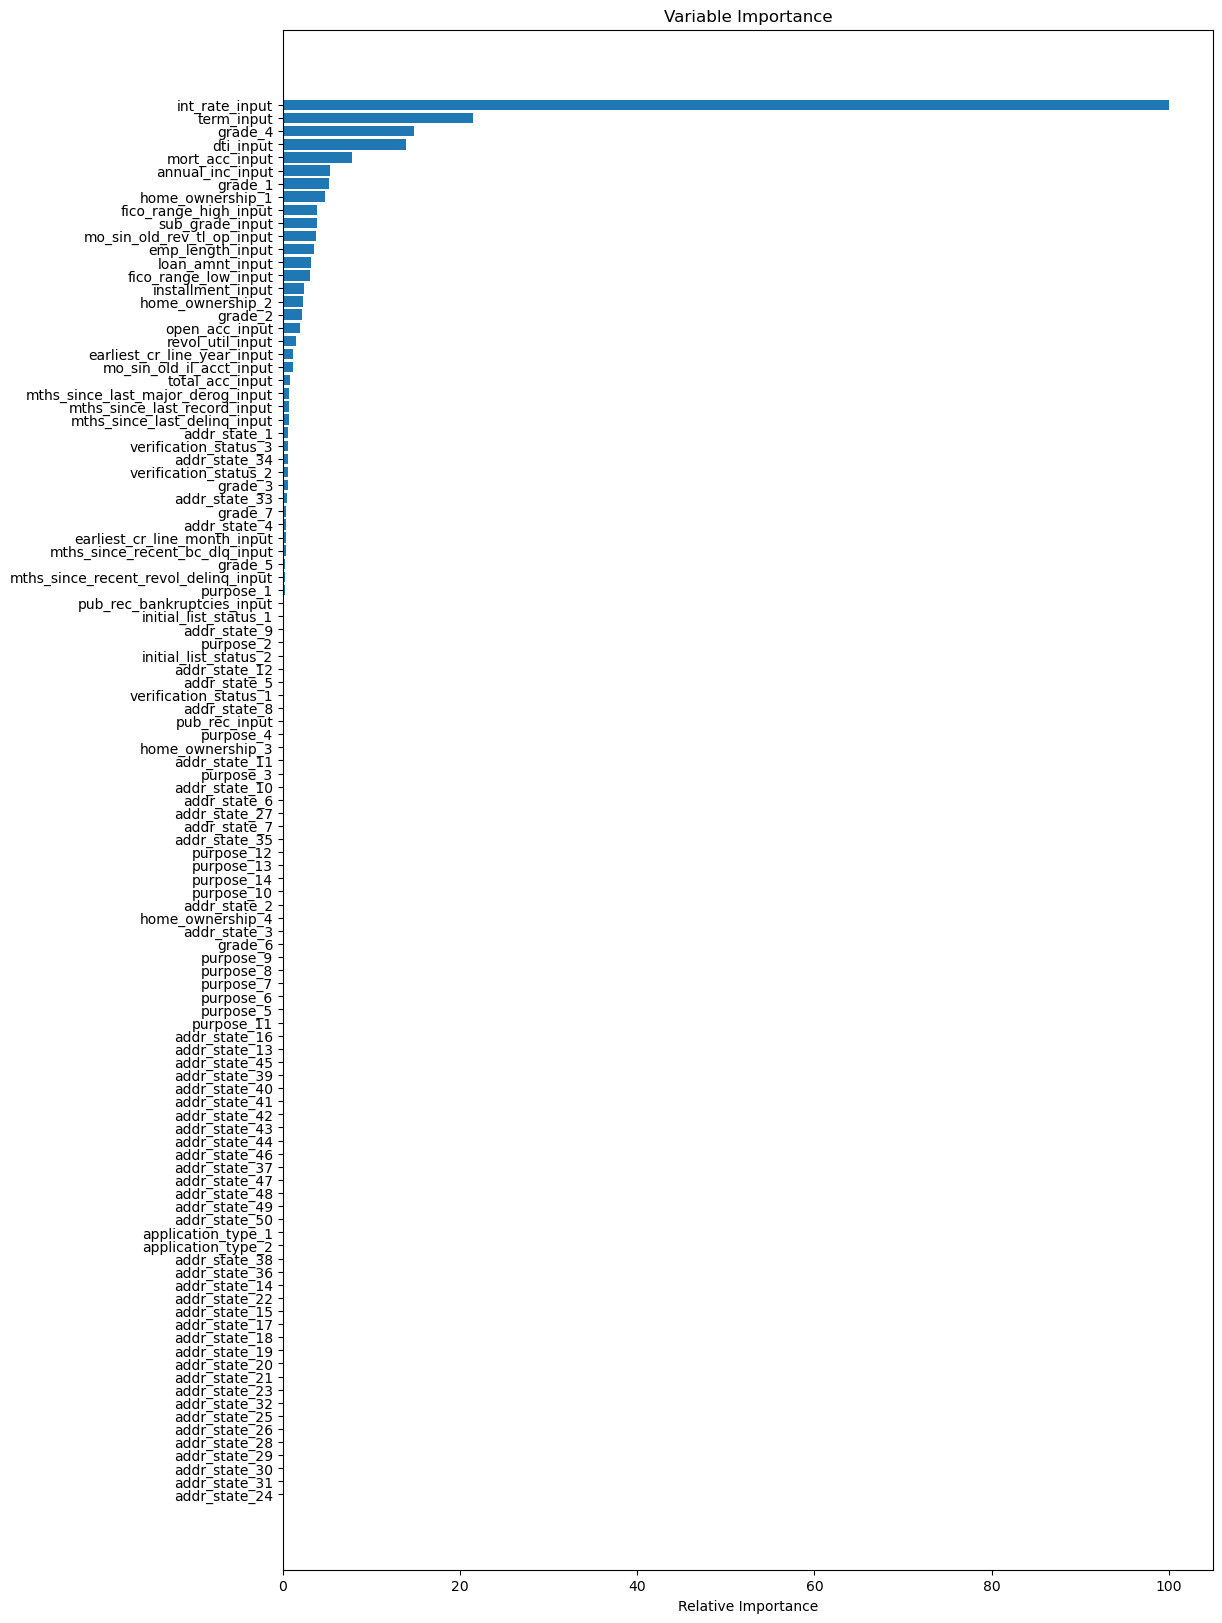

In [24]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_t.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [37]:
pred_test = clf.predict_proba(X_test_t)
pred_train = clf.predict_proba(X_train_t)
pred_test
pred_train.shape

(354053, 2)

Curva roc

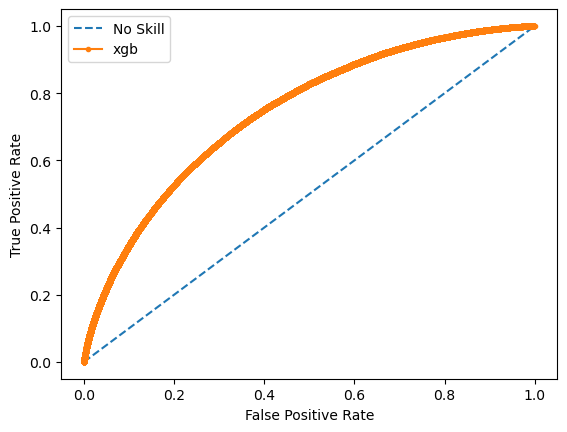

In [26]:
# keep probabilities for the positive outcome only
yhat_train = pred_train[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat_train)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='xgb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [27]:
# calculate AUC
auc = roc_auc_score(y_train, yhat_train)
print('AUC: %.3f' % auc)

AUC: 0.743


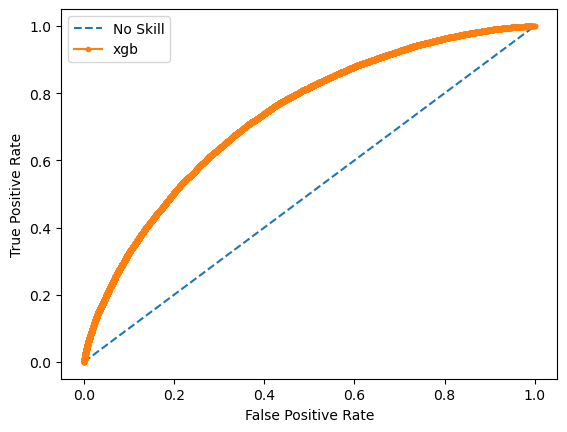

In [28]:
# keep probabilities for the positive outcome only
yhat = pred_test[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='xgb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [29]:
# calculate AUC
auc = roc_auc_score(y_test, yhat)
print('AUC: %.3f' % auc)

AUC: 0.732


Curva precision-recall

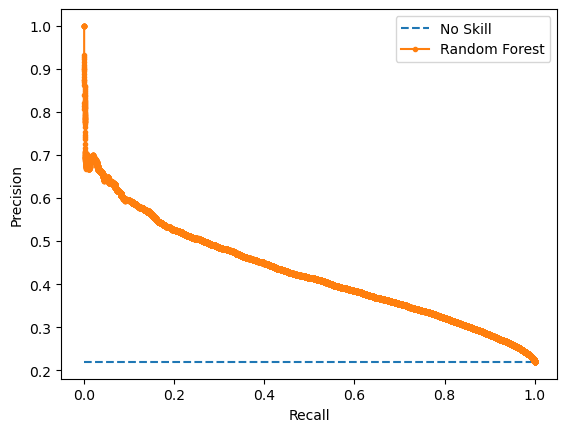

In [30]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [32]:
from sklearn.metrics import auc

# Supongamos que 'recall' y 'precision' son tus datos
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.4278886652935424
0.4278886652935424


In [34]:
print(metrics.classification_report(y_train.astype(float).values, pred_train[:,0].astype(float)))

ValueError: Classification metrics can't handle a mix of binary and continuous targets